In [131]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# predict diamond price

**Duomenų analizė**

In [132]:
# read file 
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
df = pd.read_csv("train.csv")
df = df[['MSSubClass', 'LotArea', 'GrLivArea', 'YearBuilt', 'GarageType', 'HouseStyle', 'RoofStyle', 'Foundation', 'CentralAir', 'SalePrice']]
df['CentralAir'] = df['CentralAir'].replace({'Y': 1, 'N': 0})
df.head()

MSSubClass  LotArea  GrLivArea  YearBuilt GarageType HouseStyle RoofStyle  \
0          60     8450       1710       2003     Attchd     2Story     Gable   
1          20     9600       1262       1976     Attchd     1Story     Gable   
2          60    11250       1786       2001     Attchd     2Story     Gable   
3          70     9550       1717       1915     Detchd     2Story     Gable   
4          60    14260       2198       2000     Attchd     2Story     Gable   

  Foundation  CentralAir  SalePrice  
0      PConc           1     208500  
1     CBlock           1     181500  
2      PConc           1     223500  
3     BrkTil           1     140000  
4      PConc           1     250000

In [133]:
# pandas syntax: delete rows with condition 
missing_values_count = df.isna().sum()
missing_values_count


MSSubClass     0
LotArea        0
GrLivArea      0
YearBuilt      0
GarageType    81
HouseStyle     0
RoofStyle      0
Foundation     0
CentralAir     0
SalePrice      0
dtype: int64

In [134]:
# get ABT
df.describe(include='all')


MSSubClass        LotArea    GrLivArea    YearBuilt GarageType  \
count   1460.000000    1460.000000  1460.000000  1460.000000       1379   
unique          NaN            NaN          NaN          NaN          6   
top             NaN            NaN          NaN          NaN     Attchd   
freq            NaN            NaN          NaN          NaN        870   
mean      56.897260   10516.828082  1515.463699  1971.267808        NaN   
std       42.300571    9981.264932   525.480383    30.202904        NaN   
min       20.000000    1300.000000   334.000000  1872.000000        NaN   
25%       20.000000    7553.500000  1129.500000  1954.000000        NaN   
50%       50.000000    9478.500000  1464.000000  1973.000000        NaN   
75%       70.000000   11601.500000  1776.750000  2000.000000        NaN   
max      190.000000  215245.000000  5642.000000  2010.000000        NaN   

       HouseStyle RoofStyle Foundation   CentralAir      SalePrice  
count        1460      1460       1460  1460.000000    1460.000000  
unique          8         6          6          NaN            NaN  
top        1Story     Gable      PConc          NaN            NaN  
freq          726      1141        647          NaN            NaN  
mean          NaN       NaN        NaN     0.934932  180921.195890  
std           NaN       NaN        NaN     0.246731   79442.502883  
min           NaN       NaN        NaN     0.000000   34900.000000  
25%           NaN       NaN        NaN     1.000000  129975.000000  
50%           NaN       NaN        NaN     1.000000  163000.000000  
75%           NaN       NaN        NaN     1.000000  214000.000000  
max           NaN       NaN        NaN     1.000000  755000.000000

In [135]:
continuousFeatures = df.select_dtypes(exclude=['object']).columns.tolist()
print(continuousFeatures)
categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()
print(categoricalFeatures)

['MSSubClass', 'LotArea', 'GrLivArea', 'YearBuilt', 'CentralAir', 'SalePrice']
['GarageType', 'HouseStyle', 'RoofStyle', 'Foundation']


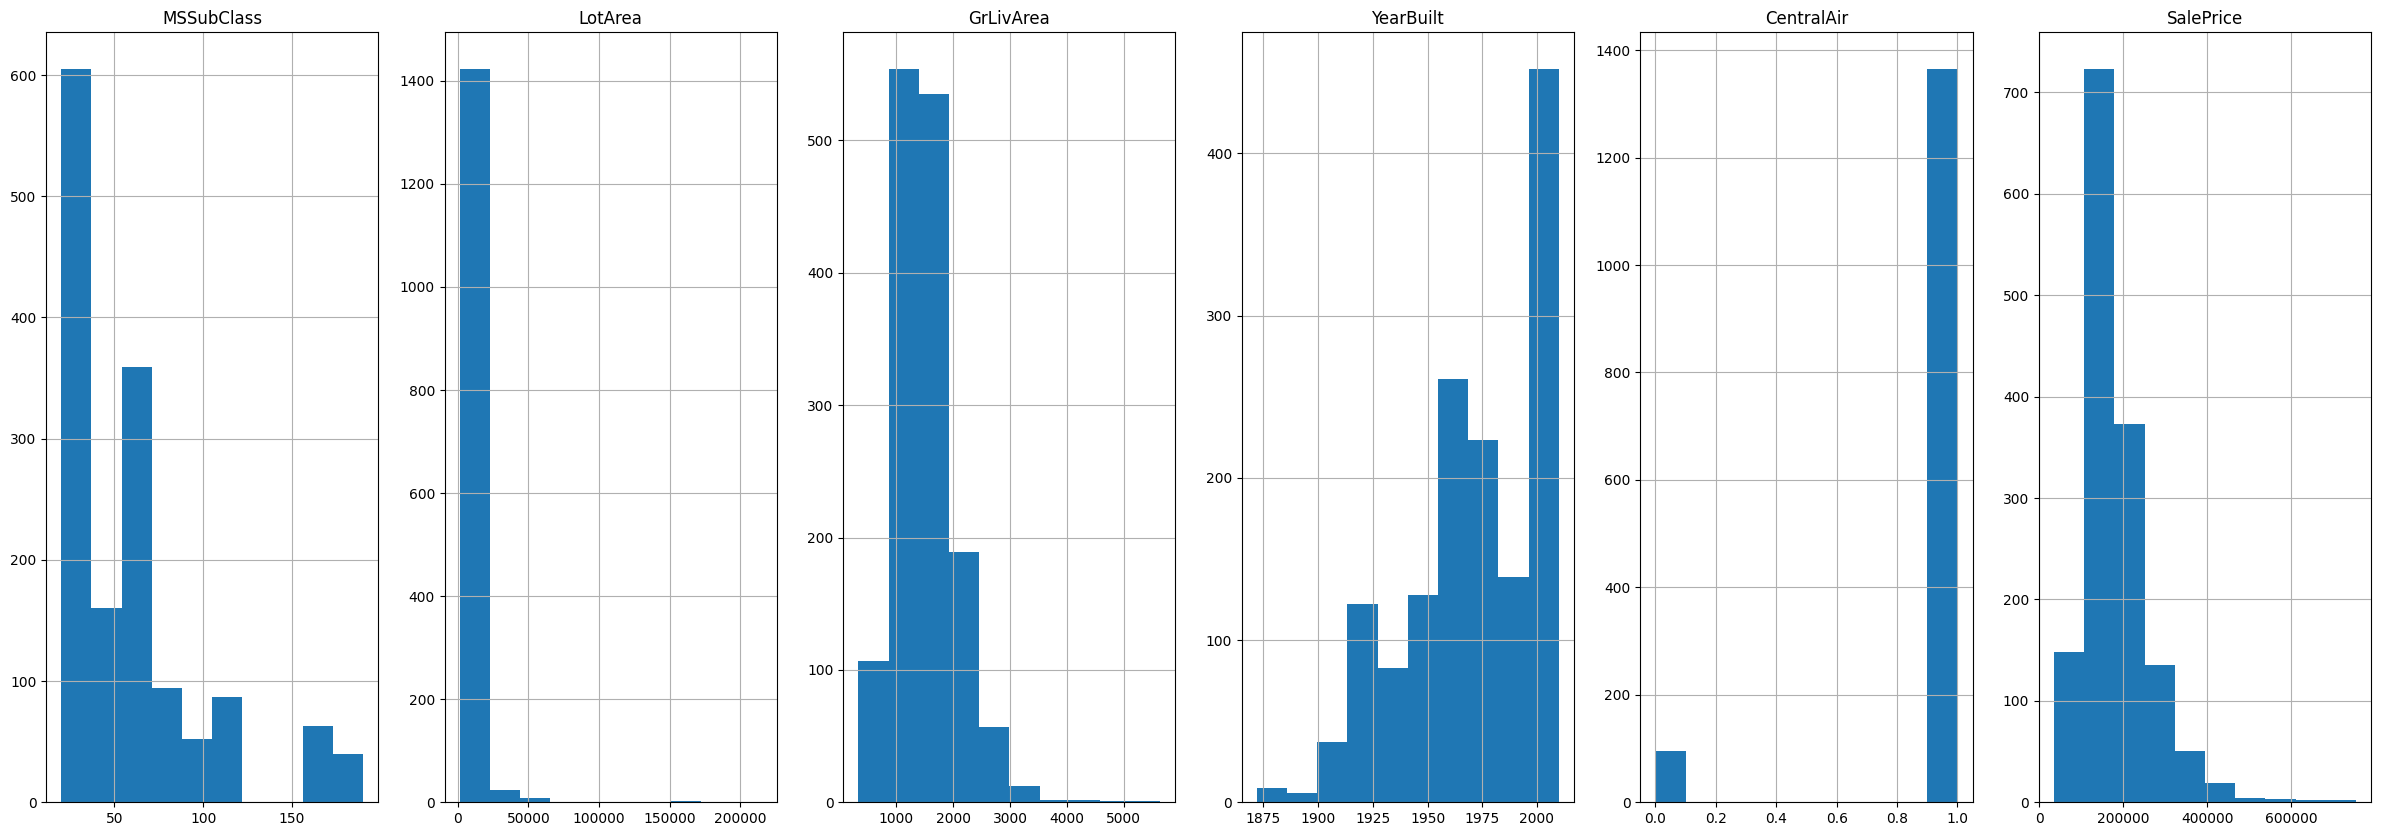

In [136]:
fig, ax = plt.subplots(1, len(continuousFeatures))
fig.set_size_inches(30, 10)
for i in range(len(continuousFeatures)):
  cf = continuousFeatures[i]
  df[cf].hist(bins = 10, ax = ax[i])
  ax[i].title.set_text(cf)




In [137]:
from scipy import stats

# Assuming you have a DataFrame named 'df' with the data you want to test

# Replace 'column_name' with the name of the column you want to test
columns_to_test = ['MSSubClass', 'LotArea', 'GrLivArea', 'YearBuilt', 'SalePrice']

for column_name in columns_to_test:
    # Extract the data from the DataFrame
    data = df[column_name]
    
    # Perform the Anderson-Darling test
    result = stats.anderson(data)
    
    # The 'result' variable contains the Anderson-Darling test statistic and critical values
    # You can access the test statistic and critical values as follows
    test_statistic = result.statistic
    critical_values = result.critical_values
    
    # Print the results for each column
    print("Anderson-Darling Test Statistic for", column_name, ":", test_statistic)
    print("Critical Values for", column_name, ":", critical_values)
    
    # Check if the sample comes from a normal distribution based on the test statistic and critical values
    if test_statistic > critical_values[2]:
        print("The data in column", column_name, "does not come from a normal distribution (at the 5% significance level).")
        print("-----------------------------------------------------------------------------------------------------------")
    else:
        print("The data in column", column_name, "comes from a normal distribution (at the 5% significance level).")
        print("-----------------------------------------------------------------------------------------------------------")


Anderson-Darling Test Statistic for MSSubClass : 89.2469024718389
Critical Values for MSSubClass : [0.574 0.654 0.785 0.916 1.089]
The data in column MSSubClass does not come from a normal distribution (at the 5% significance level).
-----------------------------------------------------------------------------------------------------------
Anderson-Darling Test Statistic for LotArea : 198.41833152322965
Critical Values for LotArea : [0.574 0.654 0.785 0.916 1.089]
The data in column LotArea does not come from a normal distribution (at the 5% significance level).
-----------------------------------------------------------------------------------------------------------
Anderson-Darling Test Statistic for GrLivArea : 14.532232080317044
Critical Values for GrLivArea : [0.574 0.654 0.785 0.916 1.089]
The data in column GrLivArea does not come from a normal distribution (at the 5% significance level).
------------------------------------------------------------------------------------------

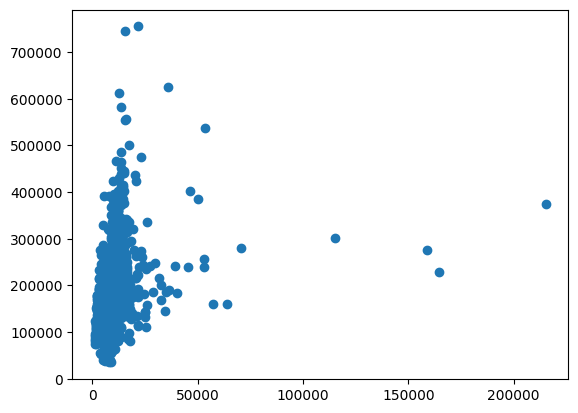

In [138]:
plt.scatter(df['LotArea'], df['SalePrice'])
# analyze outliers - are they incorrect input or rare examples?
IS = df['LotArea'] > 100000 
dfFiltered = df[IS]
dfFiltered.head()

# clamp transformation for outliers in y
Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

upperFilter = (df['LotArea'] >= Q3 + 1.5 *IQR)
lowerFilter = (df['LotArea'] <= Q1 - 1.5 *IQR)
df.loc[upperFilter,['LotArea']]  = Q3 + 1.5 *IQR
df.loc[lowerFilter,['LotArea']]  = Q1 - 1.5 *IQR





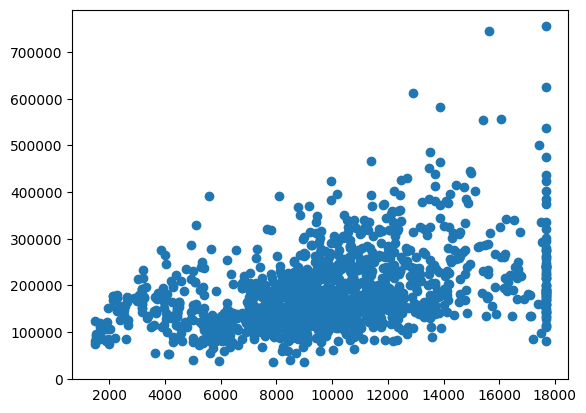

In [139]:
plt.scatter(df['LotArea'], df['SalePrice'])


array([[<AxesSubplot:xlabel='MSSubClass', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='LotArea', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='CentralAir', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>],
       [<AxesSubplot:xlabel='MSSubClass', ylabel='LotArea'>,
        <AxesSubplot:xlabel='LotArea', ylabel='LotArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='LotArea'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='LotArea'>,
        <AxesSubplot:xlabel='CentralAir', ylabel='LotArea'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>],
       [<AxesSubplot:xlabel='MSSubClass', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='LotArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='GrLivArea'>,
        <Axes

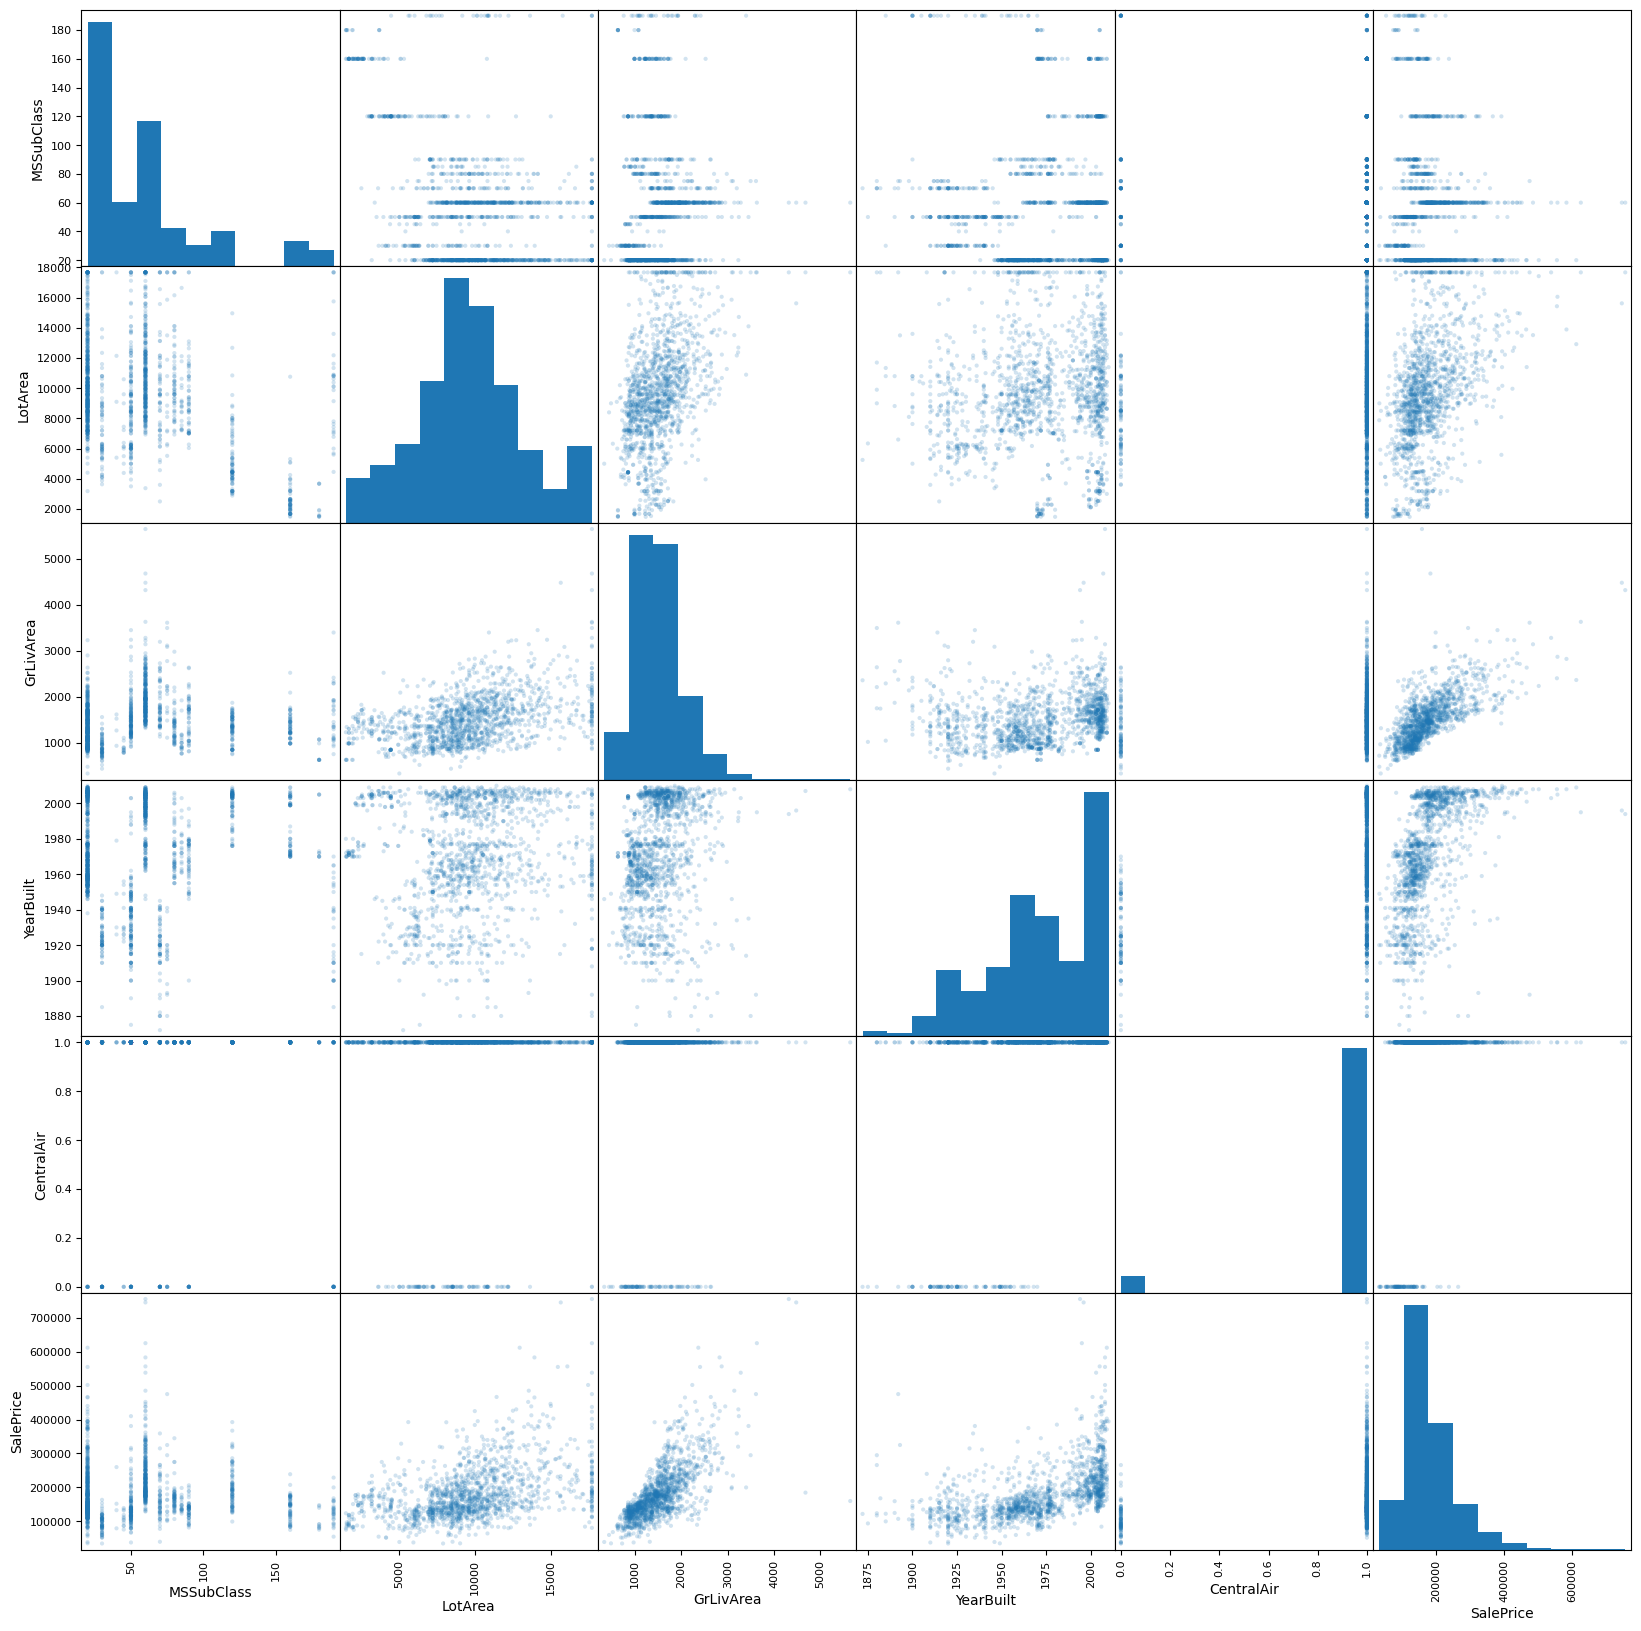

In [140]:
pd.plotting.scatter_matrix(df[continuousFeatures], alpha = 0.2, figsize = (20, 20))

               MSSubClass       LotArea     GrLivArea     YearBuilt  \
MSSubClass    1789.338306 -6.019058e+04  1.663845e+03  3.558134e+01   
LotArea     -60190.582452  1.291940e+07  8.258450e+05  7.129282e+03   
GrLivArea     1663.845480  8.258450e+05  2.761296e+05  3.158490e+03   
YearBuilt       35.581337  7.129282e+03  3.158490e+03  9.122154e+02   
CentralAir      -1.062207  8.080799e+01  1.214397e+01  2.845402e+00   
SalePrice  -283233.737229  1.234170e+08  2.958187e+07  1.254637e+06   

             CentralAir     SalePrice  
MSSubClass    -1.062207 -2.832337e+05  
LotArea       80.807993  1.234170e+08  
GrLivArea     12.143969  2.958187e+07  
YearBuilt      2.845402  1.254637e+06  
CentralAir     0.060876  4.926269e+03  
SalePrice   4926.269095  6.311111e+09  


Text(0.5, 1.0, "Spearman's correlation")

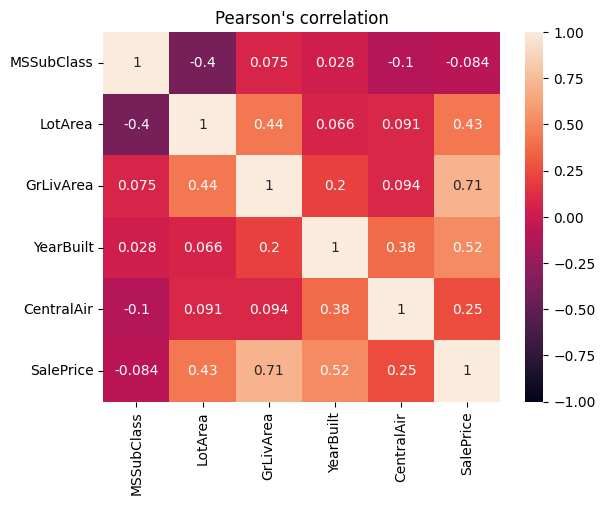

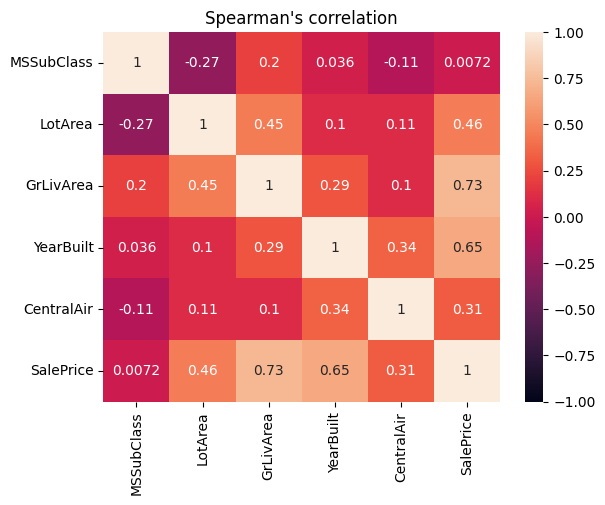

In [141]:
covariance = df[continuousFeatures].cov()
print(covariance)
import seaborn as sns
# for continuous variables with "close to normal" distribution, use Pearson's correlation
correlation = df[continuousFeatures].corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title("Pearson's correlation")
# fot continuous variables with non-Gaussian distribution, use Spearman's correlation
plt.figure()
correlationSp = df[continuousFeatures].corr(method = 'spearman')
sns.heatmap(correlationSp, vmin=-1, vmax=1,  annot=True)
plt.title("Spearman's correlation")

value counts
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
frequencies
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64
------------------------------------------
value counts
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
frequencies
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64
------------------------------------------
value counts
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
frequencies
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       

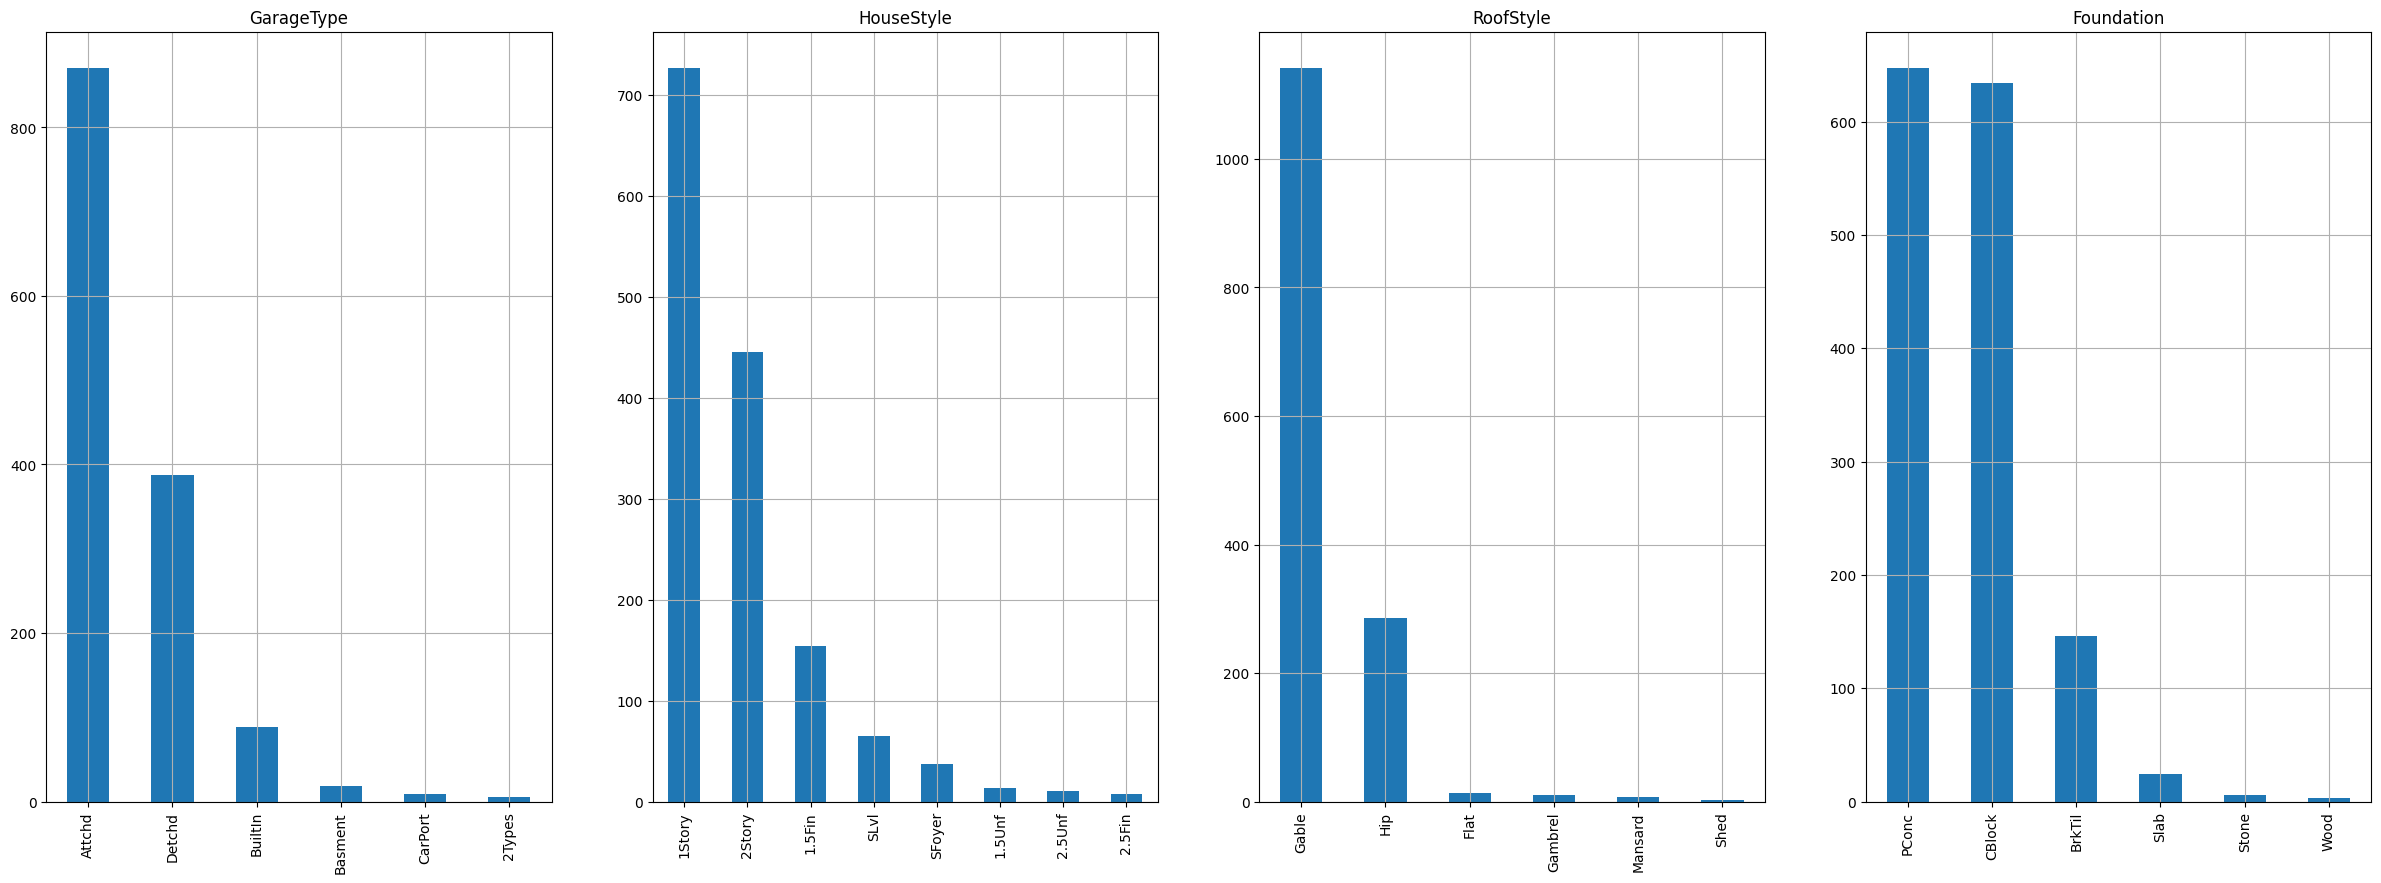

In [142]:
# get value counts (use for 1st, 2nd, ... mode)

fig, ax = plt.subplots(1, len(categoricalFeatures))
fig.set_size_inches(30, 10)
for i in range(len(categoricalFeatures)):
  cf = categoricalFeatures[i]
  print("value counts")
  values = df[cf].value_counts()
  print(values)
  print("frequencies")
  frequencies = df[cf].value_counts()/df[cf].size
  print(frequencies)
  print("------------------------------------------")
  values.plot(kind = 'bar', ax = ax[i])
  ax[i].title.set_text(cf)
  ax[i].grid()



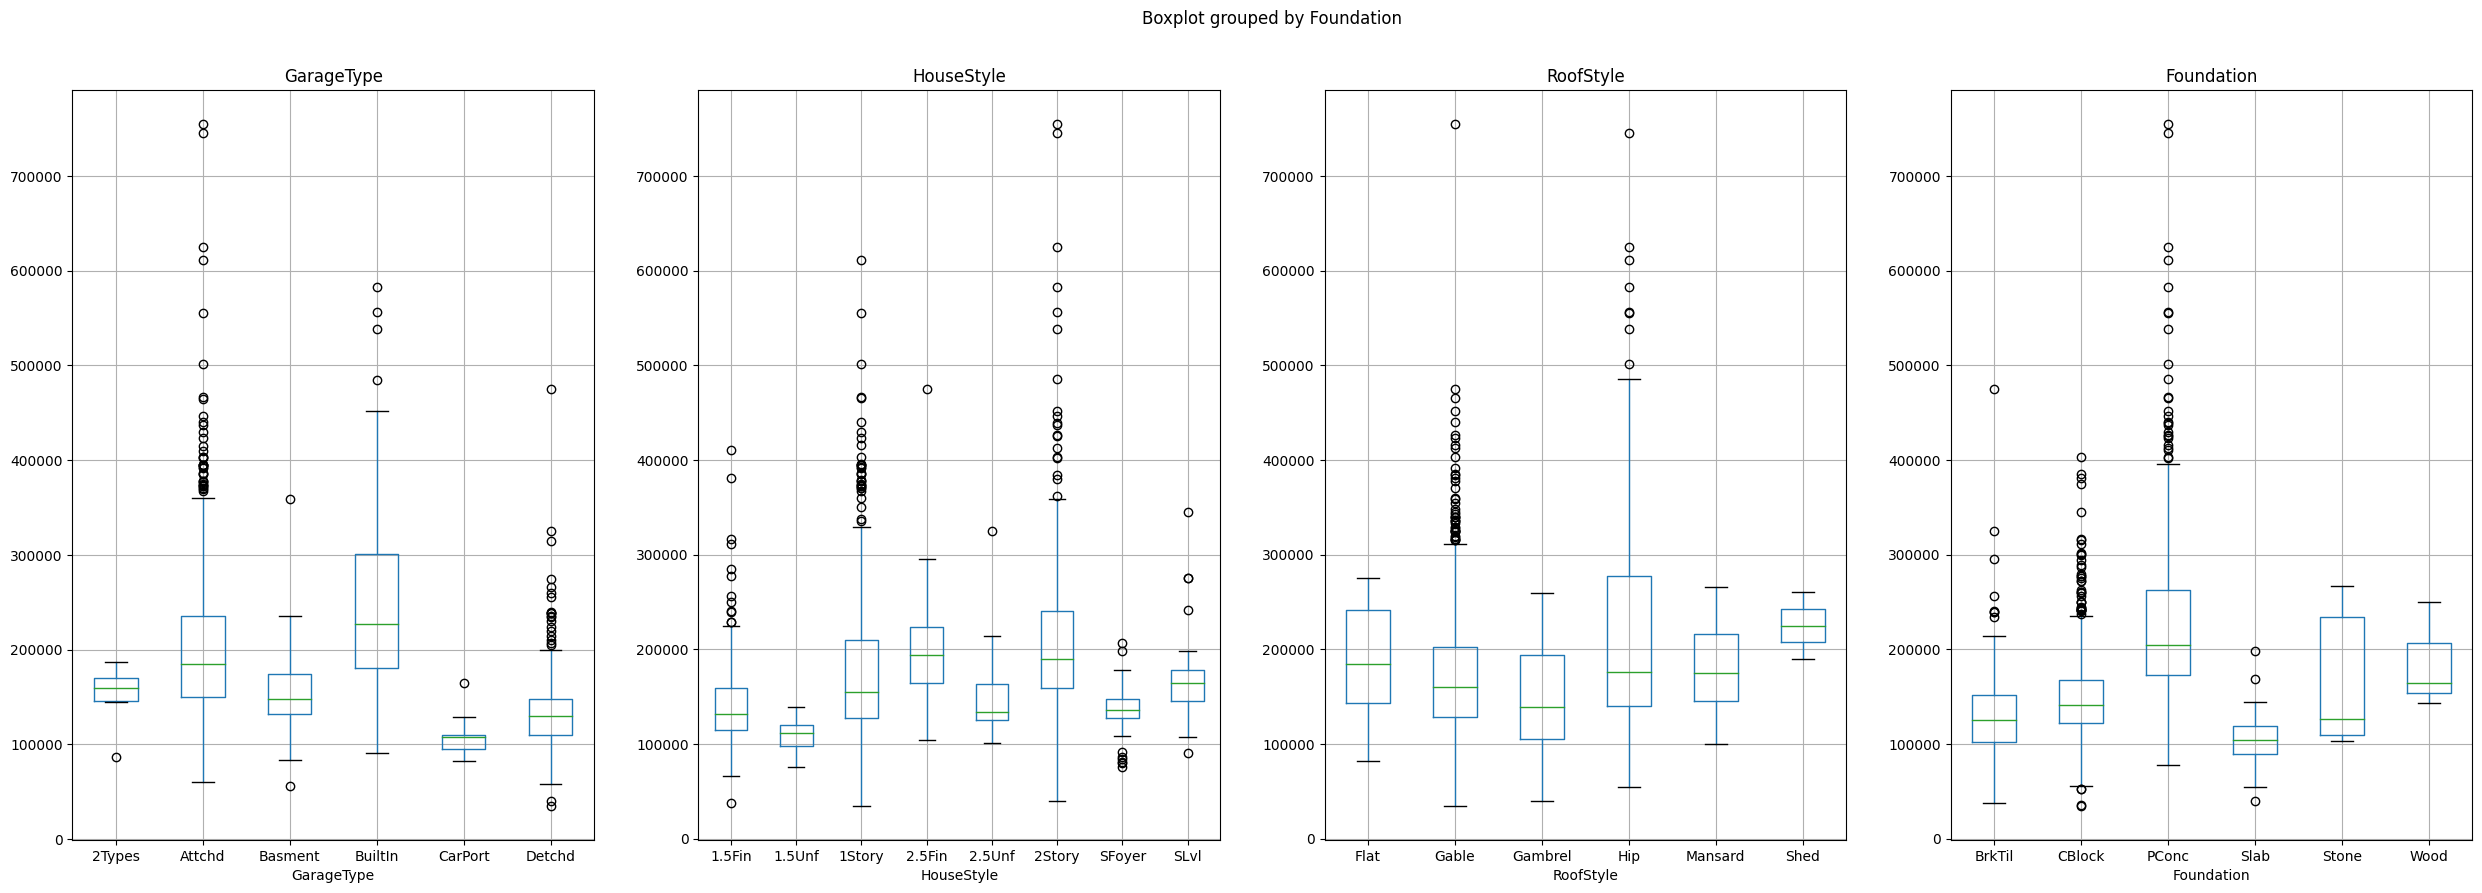

In [143]:
fig, ax = plt.subplots(1, len(categoricalFeatures))
fig.set_size_inches(30, 10)
for i in range(len(categoricalFeatures)):
  cf = categoricalFeatures[i]
  df.boxplot(column = 'SalePrice', by = cf, ax = ax[i])
  ax[i].title.set_text(cf)

In [144]:

categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()


for feature in categoricalFeatures:
  y = pd.get_dummies(df[feature], prefix=feature)
  df.drop(columns = [feature], inplace = True)
  y = y.astype(int)  # Convert True/False to 1/0
  df = pd.concat([df, y], axis = 1)


df.head()

def normalize(xxx, miu, std):
  return (xxx- miu )/std

In [145]:
#NORMALIZE DATA

df['MSSubClass'] = normalize(df['MSSubClass'], np.mean(df['MSSubClass']), np.std(df['MSSubClass']) )
df['LotArea'] = normalize(df['LotArea'], np.mean(df['LotArea']), np.std(df['LotArea']) )
df['GrLivArea'] = normalize(df['GrLivArea'], np.mean(df['GrLivArea']), np.std(df['GrLivArea']) )
df['YearBuilt'] = normalize(df['YearBuilt'], np.mean(df['YearBuilt']), np.std(df['YearBuilt']))


In [146]:
training_data = df.sample(frac=0.8, random_state=23) #random state refers to seed
testing_data = df.drop(training_data.index)


**Sprendimų medis**

In [147]:
class Node: 
  def __init__(self, feature = None, threshold = None, value = None, left = None, right = None):
    self.feature = feature
    self.threshold = threshold
    self.value = value
    self.left = left
    self.right = right

  def printInfo(self, depth, width=4):

        const = int(depth * width ** 1.5)
        spaces = "-" * const
        if self.feature is None:
          print(f"|{spaces} Predicted class: {self.value} " )
        else:
          print(f"|{spaces} Feature: {self.feature} Threshold: {self.threshold}" )

  def printNode(self, depth = 0):
        if(depth >= 3):
          return
        self.printInfo( depth)
        
        if self.left is not None: 
            self.left.printNode( depth+1)
        
        if self.right is not None:
            self.right.printNode( depth+1)
    

In [148]:

class DecisionTree:
  def __init__(self, minSamplesSplit = 2, maxDepth = 5):
    self.minSamplesSplit = minSamplesSplit
    self.maxDepth = maxDepth
    self.root = None
    self.features = None
    self.depth = 0

  def fit(self, X, y):
    self.features = list(X.columns)
    self.root = self.build(X, y)
  
  def build(self, X, y, depth = 0):
    n_samples = len(X)
    
    if n_samples >= self.minSamplesSplit and depth <= self.maxDepth:
      best = self.getBestSplit(X, y)
      if best[0] is not None:  # best found
        # split left
        is_left = X[best[0]] < best[1]
        X_left = X[is_left]
        y_left = y[is_left]
        left = self.build(X_left, y_left, depth=depth + 1)
        # split right
        X_right = X[~is_left]
        y_right = y[~is_left]
        right = self.build(X_right, y_right, depth=depth + 1)
        return Node(feature=best[0], threshold=best[1], left=left, right=right)
    return Node(value=np.mean(y))




  def getBestSplit(self, X, y):
    best_feature = None
    best_value = None
    min_mse = None

    for feature in self.features:
      feature_mean = np.mean(X[feature])

      left_values = y[X[feature] < feature_mean]
      right_values = y[X[feature] >= feature_mean]

      mse_left = np.mean((left_values - np.mean(left_values))**2)
      mse_right = np.mean((right_values - np.mean(right_values))**2)

      mse = (len(left_values) / len(y)) * mse_left + (len(right_values) / len(y)) * mse_right

      if min_mse is None or mse < min_mse:
        min_mse = mse
        best_feature = feature
        best_value = feature_mean

    return best_feature, best_value, min_mse
  
  

  def _predict_sample(self, tree, sample):
    if tree.value is not None:
      return tree.value

    if sample[tree.feature] < tree.threshold:
      return self._predict_sample(tree.left, sample)
    else:
      return self._predict_sample(tree.right, sample)

  def predict(self, X):
    return [self._predict_sample(self.root, x) for _, x in X.iterrows()]

  def print_tree(self):
    if self.root is not None:
      self.root.printNode()








In [149]:
X_train = training_data.drop(["SalePrice"], axis=1)
y_train = training_data['SalePrice']

X_test = testing_data.drop(["SalePrice"], axis=1)
y_test = testing_data['SalePrice']


In [150]:
dt1 = DecisionTree(maxDepth = 5, minSamplesSplit=2)
dt1.fit(X_train, y_train)

dt1.print_tree()


| Feature: GrLivArea Threshold: -0.015455279461157493
|-------- Feature: Foundation_PConc Threshold: 0.3230293663060278
|---------------- Feature: GarageType_Attchd Threshold: 0.4292237442922374
|---------------- Feature: YearBuilt Threshold: 0.6104403568378644
|-------- Feature: YearBuilt Threshold: 0.2133123323588448
|---------------- Feature: LotArea Threshold: 0.4392809105647393
|---------------- Feature: GrLivArea Threshold: 0.8519255388627234


In [151]:
pred1train = dt1.predict(X_train)
pred1test = dt1.predict(X_test)

print(f"Training MSE: {mean_squared_error(pred1train, y_train)}")
print(f"Training MAPE: {mean_absolute_percentage_error(pred1train, y_train)}")

print(f"Testing MSE: {mean_squared_error(pred1test, y_test)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(pred1test, y_test)}")

Training MSE: 1395600195.5177386
Training MAPE: 0.12431722925929434
Testing MSE: 1655887596.8728652
Testing MAPE: 0.1366262434273036


In [152]:
dt2 = DecisionTree(maxDepth = 10, minSamplesSplit=2)
dt2.fit(X_train, y_train)

dt2.print_tree()


| Feature: GrLivArea Threshold: -0.015455279461157493
|-------- Feature: Foundation_PConc Threshold: 0.3230293663060278
|---------------- Feature: GarageType_Attchd Threshold: 0.4292237442922374
|---------------- Feature: YearBuilt Threshold: 0.6104403568378644
|-------- Feature: YearBuilt Threshold: 0.2133123323588448
|---------------- Feature: LotArea Threshold: 0.4392809105647393
|---------------- Feature: GrLivArea Threshold: 0.8519255388627234


In [153]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming pred2train and pred2test are arrays or Series
indices_with_nan_train = np.isnan(pred2train)
pred2train_cleaned = np.extract(~indices_with_nan_train, pred2train)
y_train_cleaned = y_train.loc[~indices_with_nan_train]

indices_with_nan_test = np.isnan(pred2test)
pred2test_cleaned = np.extract(~indices_with_nan_test, pred2test)
y_test_cleaned = y_test.loc[~indices_with_nan_test]

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

print(f"Training MSE: {mean_squared_error(pred2train_cleaned, y_train_cleaned)}")
print(f"Training MAPE: {mean_absolute_percentage_error(y_train_cleaned, pred2train_cleaned)}")

print(f"Testing MSE: {mean_squared_error(pred2test_cleaned, y_test_cleaned)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(y_test_cleaned, pred2test_cleaned)}")


Training MSE: 781049777.1066056
Training MAPE: 0.06867310027140928
Testing MSE: 1998720660.9919322
Testing MAPE: 0.16654345278055344


In [154]:
dt3 = DecisionTree(maxDepth = 5, minSamplesSplit=4)
dt3.fit(X_train, y_train)

dt3.print_tree()

| Feature: GrLivArea Threshold: -0.015455279461157493
|-------- Feature: Foundation_PConc Threshold: 0.3230293663060278
|---------------- Feature: GarageType_Attchd Threshold: 0.4292237442922374
|---------------- Feature: YearBuilt Threshold: 0.6104403568378644
|-------- Feature: YearBuilt Threshold: 0.2133123323588448
|---------------- Feature: LotArea Threshold: 0.4392809105647393
|---------------- Feature: GrLivArea Threshold: 0.8519255388627234


In [155]:
pred3train = dt3.predict(X_train)
pred3test = dt3.predict(X_test)

print(f"Training MSE: {mean_squared_error(pred3train, y_train)}")
print(f"Training MAPE: {mean_absolute_percentage_error(pred3train, y_train)}")

print(f"Testing MSE: {mean_squared_error(pred3test, y_test)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(pred3test, y_test)}")

Training MSE: 1395600195.5177386
Training MAPE: 0.12431722925929434
Testing MSE: 1655887596.8728652
Testing MAPE: 0.1366262434273036


In [156]:
dt4 = DecisionTree(maxDepth = 10, minSamplesSplit=4)
dt4.fit(X_train, y_train)

dt4.print_tree()

| Feature: GrLivArea Threshold: -0.015455279461157493
|-------- Feature: Foundation_PConc Threshold: 0.3230293663060278
|---------------- Feature: GarageType_Attchd Threshold: 0.4292237442922374
|---------------- Feature: YearBuilt Threshold: 0.6104403568378644
|-------- Feature: YearBuilt Threshold: 0.2133123323588448
|---------------- Feature: LotArea Threshold: 0.4392809105647393
|---------------- Feature: GrLivArea Threshold: 0.8519255388627234


In [157]:


indices_with_nan_train4 = np.isnan(pred4train)
pred4train_cleaned = pd.Series(pred4train)[~indices_with_nan_train4].values
y_train_cleaned4 = y_train.dropna()[~indices_with_nan_train4]

indices_with_nan_test4 = np.isnan(pred4test)
pred4test_cleaned = pd.Series(pred4test)[~indices_with_nan_test4].values
y_test_cleaned4 = y_test.dropna()[~indices_with_nan_test4]

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

print(f"Training MSE: {mean_squared_error(pred4train_cleaned, y_train_cleaned4)}")
print(f"Training MAPE: {mean_absolute_percentage_error(y_train_cleaned4, pred4train_cleaned)}")

# Ensure lengths are consistent before calculating testing metrics
if len(pred4test_cleaned) == len(y_test_cleaned4):
    print(f"Testing MSE: {mean_squared_error(pred4test_cleaned, y_test_cleaned4)}")
    print(f"Testing MAPE: {mean_absolute_percentage_error(y_test_cleaned4, pred4test_cleaned)}")
else:
    print("Error: Inconsistent lengths between pred4test_cleaned and y_test_cleaned4")


Training MSE: 880943191.6135979
Training MAPE: 0.0797900716867116
Testing MSE: 1870738307.8458502
Testing MAPE: 0.16660262126144995


In [158]:
dt5 = DecisionTree(maxDepth = 3, minSamplesSplit=5)
dt5.fit(X_train, y_train)

dt5.print_tree()

| Feature: GrLivArea Threshold: -0.015455279461157493
|-------- Feature: Foundation_PConc Threshold: 0.3230293663060278
|---------------- Feature: GarageType_Attchd Threshold: 0.4292237442922374
|---------------- Feature: YearBuilt Threshold: 0.6104403568378644
|-------- Feature: YearBuilt Threshold: 0.2133123323588448
|---------------- Feature: LotArea Threshold: 0.4392809105647393
|---------------- Feature: GrLivArea Threshold: 0.8519255388627234


In [159]:
pred5train = dt5.predict(X_train)
pred5test = dt5.predict(X_test)

print(f"Training MSE: {mean_squared_error(pred5train, y_train)}")
print(f"Training MAPE: {mean_absolute_percentage_error(pred5train, y_train)}")

print(f"Testing MSE: {mean_squared_error(pred5test, y_test)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(pred5test, y_test)}")

Training MSE: 2046267413.9008212
Training MAPE: 0.1576885720244258
Testing MSE: 1887961917.8091598
Testing MAPE: 0.15587186099091088


**Atsitiktiniai miškai**

In [160]:
class RandomForestRegressor:
    def __init__(self, n_trees, min_samples_split, max_depth):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)

            tree = DecisionTree(minSamplesSplit=self.min_samples_split, maxDepth=self.max_depth)
            tree.fit(X_sample, y_sample)

            self.trees.append(tree)

    def _bootstrap_sample(self, X, y):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        return X.iloc[indices], y.iloc[indices]

    def predict(self, X):
        predictions = [self._predict_sample(tree, X) for tree in self.trees]
        return np.mean(predictions, axis=0)

    def _predict_sample(self, tree, X):
        return [tree._predict_sample(tree.root, x) for _, x in X.iterrows()]
    
    
    


In [161]:
rfr1 = RandomForestRegressor(n_trees=10, max_depth=5, min_samples_split=4)
rfr1.fit(X_train, y_train)

In [162]:
rfrpred1train = rfr1.predict(X_train)
rfrpred1test = rfr1.predict(X_test)

indices_with_nan = np.isnan(rfrpred1train)
rfrpred1train_cleaned = rfrpred1train[~indices_with_nan]
y_train_cleaned = y_train.loc[~indices_with_nan]

indices_with_nan = np.isnan(rfrpred1test)
rfrpred1test_cleaned = rfrpred1test[~indices_with_nan]
y_test_cleaned = y_test.loc[~indices_with_nan]

print(f"Training MSE: {mean_squared_error(rfrpred1train_cleaned, y_train_cleaned)}")
print(f"Training MAPE: {mean_absolute_percentage_error(rfrpred1train_cleaned, y_train_cleaned)}")

print(f"Testing MSE: {mean_squared_error(rfrpred1test_cleaned, y_test_cleaned)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(rfrpred1test_cleaned, y_test_cleaned)}")

Training MSE: 1108692839.4866083
Training MAPE: 0.11186096927023624
Testing MSE: 1497523573.1732202
Testing MAPE: 0.125042298092684


In [163]:
rfr2 = RandomForestRegressor(n_trees=15, max_depth = 5, min_samples_split=4)
rfr2.fit(X_train, y_train)

In [164]:
rfrpred2train = rfr2.predict(X_train)
rfrpred2test = rfr2.predict(X_test)

indices_with_nan = np.isnan(rfrpred2train)
rfrpred2train_cleaned = rfrpred2train[~indices_with_nan]
y_train_cleaned = y_train.loc[~indices_with_nan]

indices_with_nan = np.isnan(rfrpred2test)
rfrpred2test_cleaned = rfrpred2test[~indices_with_nan]
y_test_cleaned = y_test.loc[~indices_with_nan]


print(f"Training MSE: {mean_squared_error(rfrpred2train_cleaned, y_train_cleaned)}")
print(f"Training MAPE: {mean_absolute_percentage_error(rfrpred2train_cleaned, y_train_cleaned)}")

print(f"Testing MSE: {mean_squared_error(rfrpred2test_cleaned, y_test_cleaned)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(rfrpred2test_cleaned, y_test_cleaned)}")

Training MSE: 1089141005.9962847
Training MAPE: 0.11240329806258766
Testing MSE: 1512097207.0333204
Testing MAPE: 0.12144776485408056


In [165]:
rfr3 = RandomForestRegressor(n_trees=25, max_depth = 5, min_samples_split=4)
rfr3.fit(X_train, y_train)

In [166]:
rfrpred3train = rfr3.predict(X_train)
rfrpred3test = rfr3.predict(X_test)

indices_with_nan = np.isnan(rfrpred3train)
rfrpred3train_cleaned = rfrpred3train[~indices_with_nan]
y_train_cleaned = y_train.loc[~indices_with_nan]

indices_with_nan = np.isnan(rfrpred3test)
rfrpred3test_cleaned = rfrpred3test[~indices_with_nan]
y_test_cleaned = y_test.loc[~indices_with_nan]


print(f"Training MSE: {mean_squared_error(rfrpred3train_cleaned, y_train_cleaned)}")
print(f"Training MAPE: {mean_absolute_percentage_error(rfrpred3train_cleaned, y_train_cleaned)}")

print(f"Testing MSE: {mean_squared_error(rfrpred3test_cleaned, y_test_cleaned)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(rfrpred3test_cleaned, y_test_cleaned)}")

Training MSE: 1139176556.1403577
Training MAPE: 0.11211845802110033
Testing MSE: 1540336191.5479631
Testing MAPE: 0.12407110472251187


**Scikit-learn atsitiktiniai miškai**

In [167]:
from sklearn.ensemble import RandomForestRegressor

skrfr1 = RandomForestRegressor(n_estimators=10, random_state=0)

skrfr1.fit(X_train, y_train)

skpred1train = skrfr1.predict(X_train)
skpred1test = skrfr1.predict(X_test)

print(f"Training MSE: {mean_squared_error(skpred1train, y_train)}")
print(f"Training MAPE: {mean_absolute_percentage_error(skpred1train, y_train)}")

print(f"Testing MSE: {mean_squared_error(skpred1test, y_test)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(skpred1test, y_test)}")


Training MSE: 288334371.744952
Training MAPE: 0.051632896156103
Testing MSE: 1705086429.180948
Testing MAPE: 0.11513256718463312


In [168]:
from sklearn.ensemble import RandomForestRegressor

skrfr2 = RandomForestRegressor(n_estimators=15, random_state=0)

skrfr2.fit(X_train, y_train)

skpred2train = skrfr2.predict(X_train)
skpred2test = skrfr2.predict(X_test)

print(f"Training MSE: {mean_squared_error(skpred2train, y_train)}")
print(f"Training MAPE: {mean_absolute_percentage_error(skpred2train, y_train)}")

print(f"Testing MSE: {mean_squared_error(skpred2test, y_test)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(skpred2test, y_test)}")


Training MSE: 245351570.23495337
Training MAPE: 0.04922121004526253
Testing MSE: 1495591820.9951298
Testing MAPE: 0.11161062229559061


In [169]:
from sklearn.ensemble import RandomForestRegressor

skrfr3 = RandomForestRegressor(n_estimators=25, random_state=0)

skrfr3.fit(X_train, y_train)

skpred3train = skrfr3.predict(X_train)
skpred3test = skrfr3.predict(X_test)

print(f"Training MSE: {mean_squared_error(skpred3train, y_train)}")
print(f"Training MAPE: {mean_absolute_percentage_error(skpred3train, y_train)}")

print(f"Testing MSE: {mean_squared_error(skpred3test, y_test)}")
print(f"Testing MAPE: {mean_absolute_percentage_error(skpred3test, y_test)}")


Training MSE: 193900446.3152084
Training MAPE: 0.04769970912238191
Testing MSE: 1437024384.9928858
Testing MAPE: 0.11076838619910748


In [171]:
from prettytable import PrettyTable

# IMPORT YOUR DATA
test_data = pd.read_csv("train.csv")


test_data = test_data[['MSSubClass', 'LotArea', 'GrLivArea', 'YearBuilt', 'GarageType', 'HouseStyle', 'RoofStyle', 'Foundation', 'CentralAir', 'SalePrice']]
test_data['CentralAir'] = test_data['CentralAir'].replace({'Y': 1, 'N': 0})

test_data['MSSubClass'] = normalize(test_data['MSSubClass'], np.mean(test_data['MSSubClass']), np.std(test_data['MSSubClass']) )
test_data['LotArea'] = normalize(test_data['LotArea'], np.mean(test_data['LotArea']), np.std(test_data['LotArea']) )
test_data['GrLivArea'] = normalize(test_data['GrLivArea'], np.mean(test_data['GrLivArea']), np.std(test_data['GrLivArea']) )
test_data['YearBuilt'] = normalize(test_data['YearBuilt'], np.mean(test_data['YearBuilt']), np.std(test_data['YearBuilt']))




for feature in categoricalFeatures:
  y = pd.get_dummies(test_data[feature], prefix=feature)
  test_data.drop(columns = [feature], inplace = True)
  y = y.astype(int)  # Convert True/False to 1/0
  test_data = pd.concat([test_data, y], axis = 1)



X = test_data.drop(['SalePrice'], axis=1)
y = test_data['SalePrice']

# Predictions
y_pred = rfr3.predict(X)

indices_with_nan = np.isnan(y_pred)
predCleaned = y_pred[~indices_with_nan]
yCleaned = y.loc[~indices_with_nan]


print('MAPE: {0:0.4f}'. format(mean_absolute_percentage_error(yCleaned, predCleaned)))
print('MSE: {0:0.4f}'. format(mean_squared_error(yCleaned, predCleaned)))

table = PrettyTable()

table.field_names = ["Actual", "Predicted"]


for data_pair in zip(y[:10], y_pred[:10]):
    formatted_data_pair = ["{:.2f}".format(value) for value in data_pair]
    table.add_row(formatted_data_pair)
    

print(table)

MAPE: 0.1268
MSE: 1403378145.8654
+-----------+-----------+
|   Actual  | Predicted |
+-----------+-----------+
| 208500.00 | 197432.62 |
| 181500.00 | 158658.18 |
| 223500.00 | 208201.97 |
| 140000.00 | 152125.09 |
| 250000.00 | 273957.54 |
| 143000.00 | 160420.26 |
| 307000.00 | 267224.52 |
| 200000.00 | 190580.76 |
| 129900.00 | 151630.49 |
| 118000.00 | 130230.22 |
+-----------+-----------+


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Duovis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
